# CONTOUR MASKING

using [hull of] biggest contour

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def closeCnt(image2close):
    kernel = np.ones((25,25),np.uint8)#cv.getStructuringElement(cv.MORPH_RECT,(10,10)) 
    image2close=cv.morphologyEx(image2close,cv.MORPH_CLOSE,kernel)
    image2close=cv.morphologyEx(image2close,cv.MORPH_RECT,kernel)
    kernel =cv.getStructuringElement(cv.MORPH_RECT,(10,10))
    image2close=cv.dilate(image2close,kernel,iterations=2)
    kernel = np.ones((15,15),np.uint8)
    image2close=cv.morphologyEx(image2close,cv.MORPH_OPEN,kernel)
    return image2close

def roiHud(image2hud,cnt2hud,hull2hud):
    # draw max contour
    cv.drawContours(image2hud, cnt2hud, -1,(25,205,255), 10)
    
    # draw convex hull
    cv.drawContours(image2hud, [hull2hud], -1, (255, 255, 0), 5)

    # rotated rect 
    rect = cv.minAreaRect(cnt2hud)
    box = np.int0(cv.boxPoints(rect))
    cv.drawContours(image2hud, [box], 0, (0,0,255), 8)

    # bounding rect and center
    xR,yR,wR,hR = cv.boundingRect(cnt2hud)
    cv.rectangle(image2hud, (xR,yR), (xR+wR,yR+hR), (255,0,255), 15)

    # rectangle center
    xcR,ycR=xR+wR//2, yR+hR//2
    cv.circle(image2hud, (xcR,ycR), 15, (0,255,0), 18)
    
    return image2hud, (xcR, ycR),(wR,hR)

##code below from following cell, copied for single execution of both cells
sourceimg=cv.imread('../../images/marsyard/task_new.jpg')
foreground=cv.imread('../../images/panel/paneltask_real.jpg')
imgcnts = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
imgcnts[imgcnts<10]=0
imgcnts[imgcnts>=10]=255
cnts = cv.findContours(imgcnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
maxcnt=max(cnts, key=len)
hullmax=cv.convexHull(maxcnt)
foreprint=foreground.copy()
hullMask=cv.cvtColor(cv.fillConvexPoly(np.zeros(foreprint.shape,np.uint8),hullmax,255),cv.COLOR_BGR2GRAY)
foreprint=cv.bitwise_and(foreprint,foreprint,mask=hullMask)
forehud,rco,(wr,hr)=roiHud(sourceimg,maxcnt,hullmax)
if 1:
    forehud=cv.imread('../../images/marsyard/task_new.jpg')
    #cv.circle(forehud, (rco), 15, (0,255,0), 18)

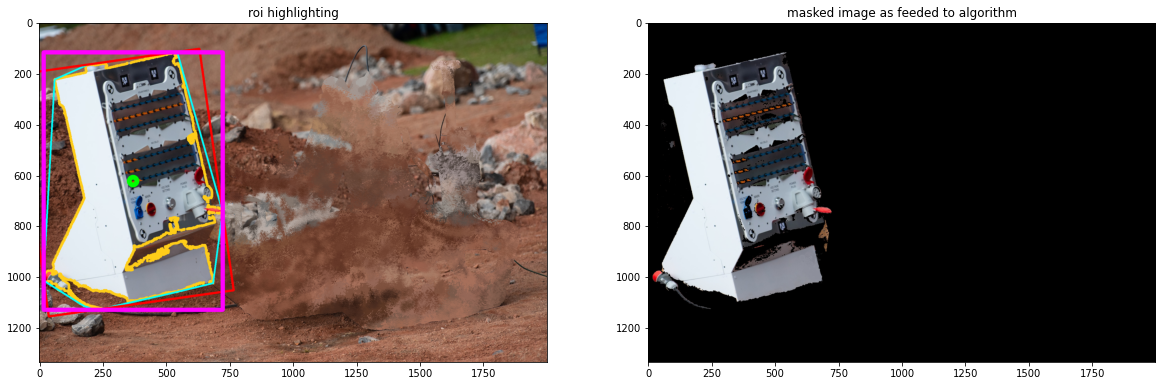

In [4]:
sourceimg=cv.imread('../../images/marsyard/task_new.jpg')
##result of previous code coventiently modified as if robot not present
foreground=cv.imread('../../images/panel/paneltask_real.jpg')
#foreground=bgForeImprov(foreground)

# foreground grayscaling and binarization
imgcnts = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
#imgtrack = cv.threshold(bpMask,10,255,0)#, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
imgcnts[imgcnts<10]=0
imgcnts[imgcnts>=10]=255

#imgcnts=cv.Canny(imgcnts,120,60)
# close max contour
#imgcnts=closeCnt(imgcnts)
# contours
cnts = cv.findContours(imgcnts, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# max contour, hull and hullmask
#maxcnt=max(cnts, key=lambda x: cv.contourArea(x)) #len)
maxcnt=max(cnts, key=len)
hullmax=cv.convexHull(maxcnt)
foreprint=foreground.copy()
hullMask=cv.cvtColor(cv.fillConvexPoly(np.zeros(foreprint.shape,np.uint8),hullmax,255),cv.COLOR_BGR2GRAY)

# masked foreground image
foreprint=cv.bitwise_and(foreprint,foreprint,mask=hullMask)

# image with roi highlight and center
forehud,rco,(wr,hr)=roiHud(sourceimg,maxcnt,hullmax)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(forehud,cv.COLOR_BGR2RGB))
plt.title('roi highlighting')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(foreprint,cv.COLOR_BGR2RGB))
plt.title('masked image as feeded to algorithm')
plt.show()

if 1:
    forehud=cv.imread('../../images/marsyard/task_new.jpg')
    #cv.circle(forehud, (rco), 15, (0,255,0), 18)

# MOTION  SIMULATION

can toggle between video recording or frame display;



motion starting
step  0 / 90
rcCx  1630 ,motestx  [1630] , stepx  45


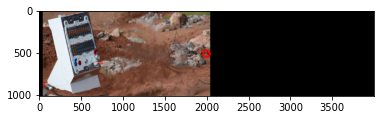

step  45 / 90
rcCx  1630 ,motestx  [1630] , stepx  45


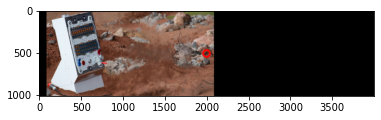

moving
step  0 / 90
rcCx  1540 ,motestx  [1630, 1540] , stepx  45


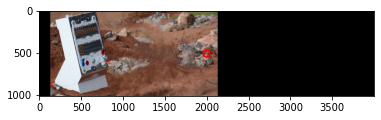

step  45 / 90
rcCx  1540 ,motestx  [1630, 1540] , stepx  45


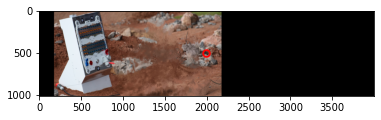

moving
step  0 / 90
rcCx  1450 ,motestx  [1630, 1540, 1450] , stepx  45


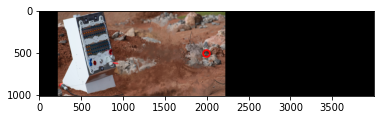

step  45 / 90
rcCx  1450 ,motestx  [1630, 1540, 1450] , stepx  45


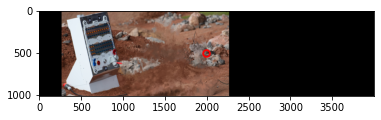

moving
step  0 / 90
rcCx  1360 ,motestx  [1540, 1450, 1360] , stepx  45


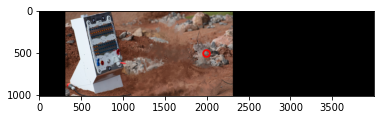

step  45 / 90
rcCx  1360 ,motestx  [1540, 1450, 1360] , stepx  45


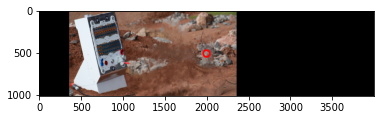

moving
step  0 / 90
rcCx  1270 ,motestx  [1450, 1360, 1270] , stepx  45


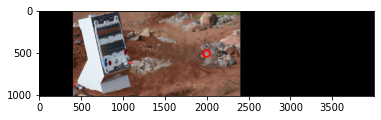

step  45 / 90
rcCx  1270 ,motestx  [1450, 1360, 1270] , stepx  45


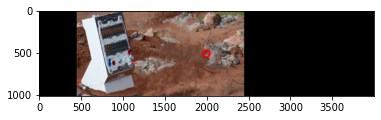

moving
step  0 / 90
rcCx  1180 ,motestx  [1360, 1270, 1180] , stepx  45


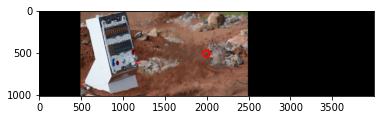

step  45 / 90
rcCx  1180 ,motestx  [1360, 1270, 1180] , stepx  45


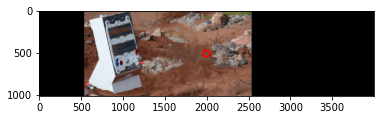

moving
step  0 / 90
rcCx  1090 ,motestx  [1270, 1180, 1090] , stepx  45


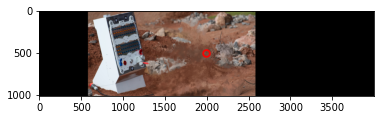

step  45 / 90
rcCx  1090 ,motestx  [1270, 1180, 1090] , stepx  45


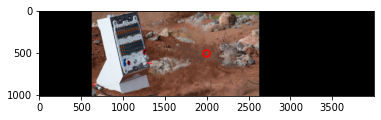

moving
step  0 / 90
rcCx  1000 ,motestx  [1180, 1090, 1000] , stepx  45


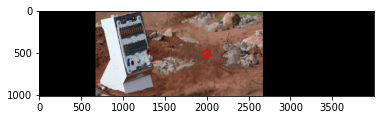

step  45 / 90
rcCx  1000 ,motestx  [1180, 1090, 1000] , stepx  45


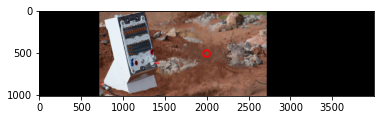

moving
step  0 / 90
rcCx  910 ,motestx  [1090, 1000, 910] , stepx  45


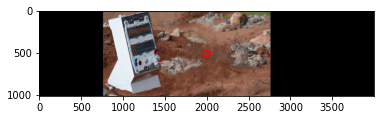

step  45 / 90
rcCx  910 ,motestx  [1090, 1000, 910] , stepx  45


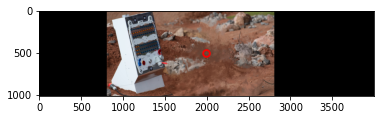

moving
step  0 / 90
rcCx  820 ,motestx  [1000, 910, 820] , stepx  45


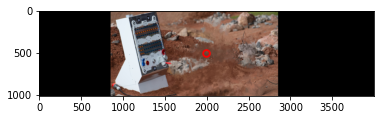

step  45 / 90
rcCx  820 ,motestx  [1000, 910, 820] , stepx  45


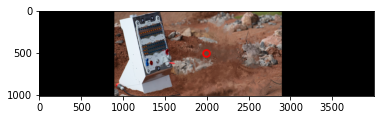

moving
step  0 / 90
rcCx  730 ,motestx  [910, 820, 730] , stepx  45


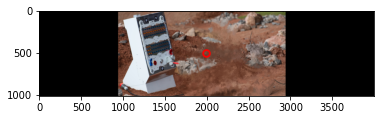

step  45 / 90
rcCx  730 ,motestx  [910, 820, 730] , stepx  45


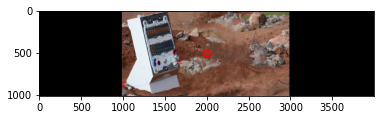

moving
step  0 / 90
rcCx  640 ,motestx  [820, 730, 640] , stepx  45


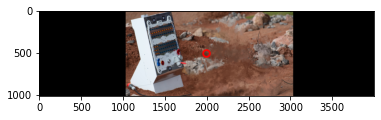

step  45 / 90
rcCx  640 ,motestx  [820, 730, 640] , stepx  45


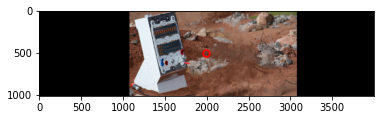

moving
step  0 / 90
rcCx  550 ,motestx  [730, 640, 550] , stepx  45


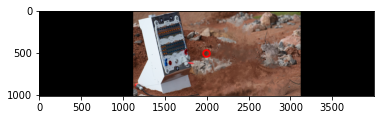

step  45 / 90
rcCx  550 ,motestx  [730, 640, 550] , stepx  45


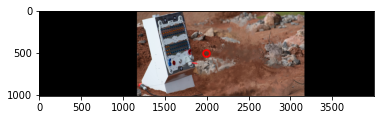

moving
step  0 / 90
rcCx  460 ,motestx  [640, 550, 460] , stepx  45


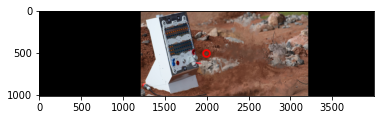

step  45 / 90
rcCx  460 ,motestx  [640, 550, 460] , stepx  45


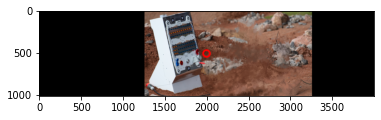

moving
step  0 / 90
rcCx  370 ,motestx  [550, 460, 370] , stepx  45


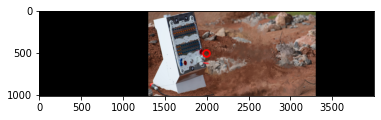

step  45 / 90
rcCx  370 ,motestx  [550, 460, 370] , stepx  45


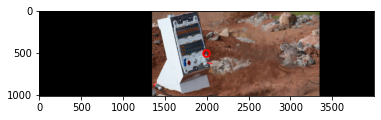

moving
step  0 / 90
rcCx  280 ,motestx  [460, 370, 280] , stepx  45


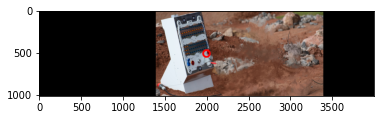

step  45 / 90
rcCx  280 ,motestx  [460, 370, 280] , stepx  45


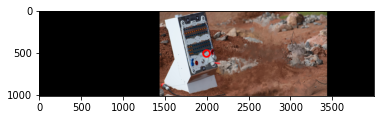

moving
step  0 / 90
rcCx  190 ,motestx  [370, 280, 190] , stepx  45


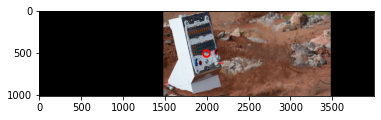

step  45 / 90
rcCx  190 ,motestx  [370, 280, 190] , stepx  45


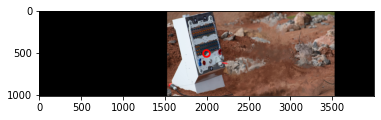

moving
step  0 / 90
rcCx  100 ,motestx  [280, 190, 100] , stepx  45


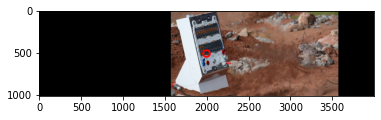

step  45 / 90
rcCx  100 ,motestx  [280, 190, 100] , stepx  45


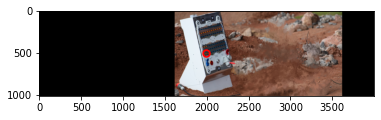

moving
step  0 / 90
rcCx  10 ,motestx  [190, 100, 10] , stepx  45


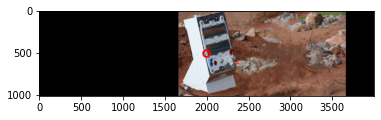

step  45 / 90
rcCx  10 ,motestx  [190, 100, 10] , stepx  45


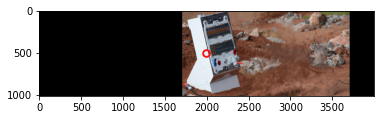

moving
step  0 / 90
rcCx  -80 ,motestx  [100, 10, -80] , stepx  45


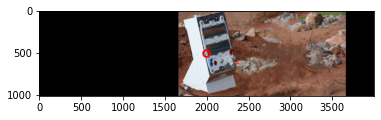

step  45 / 90
rcCx  -80 ,motestx  [100, 10, -80] , stepx  45


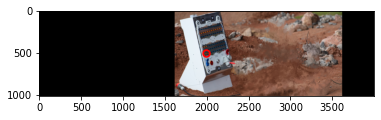

moving
oscilaltions along x!horizontal speed reduction
step  0 / 45
rcCx  10 ,motestx  [10, -80, 10] , stepx  22


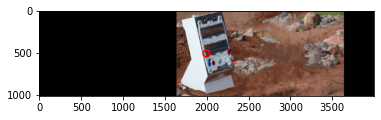

step  22 / 45
rcCx  10 ,motestx  [10, -80, 10] , stepx  22


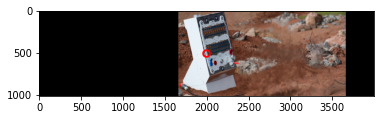

step  44 / 45
rcCx  10 ,motestx  [10, -80, 10] , stepx  22


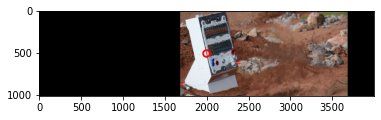

moving
oscilaltions along x!horizontal speed reduction
step  0 / 22
rcCx  -56 ,motestx  [-80, 10, -56] , stepx  11


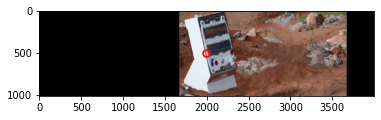

step  11 / 22
rcCx  -56 ,motestx  [-80, 10, -56] , stepx  11


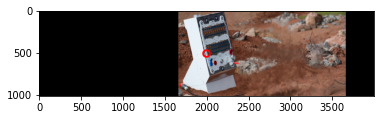

moving
step  0 / 22
rcCx  -34 ,motestx  [10, -56, -34] , stepx  11


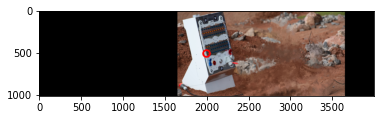

step  11 / 22
rcCx  -34 ,motestx  [10, -56, -34] , stepx  11


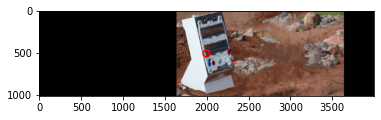

moving
step  0 / 22
rcCx  -12 ,motestx  [-56, -34, -12] , stepx  11


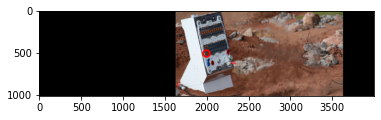

step  11 / 22
rcCx  -12 ,motestx  [-56, -34, -12] , stepx  11


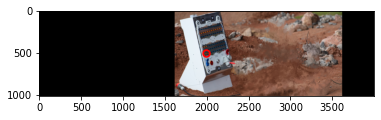

moving
step  0 / 22
rcCx  10 ,motestx  [-34, -12, 10] , stepx  11


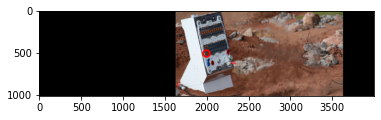

step  11 / 22
rcCx  10 ,motestx  [-34, -12, 10] , stepx  11


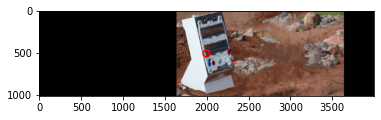

moving
oscilaltions along x!horizontal speed reduction
step  0 / 11
rcCx  -12 ,motestx  [-12, 10, -12] , stepx  5


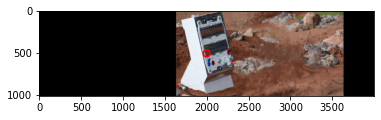

step  5 / 11
rcCx  -12 ,motestx  [-12, 10, -12] , stepx  5


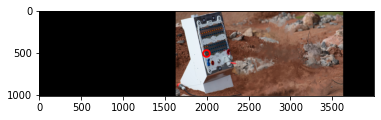

step  10 / 11
rcCx  -12 ,motestx  [-12, 10, -12] , stepx  5


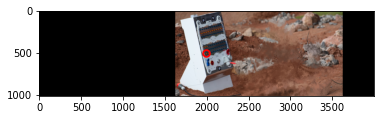

moving
oscilaltions along x!horizontal speed reduction
step  0 / 5
rcCx  3 ,motestx  [10, -12, 3] , stepx  2


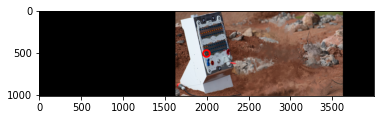

step  2 / 5
rcCx  3 ,motestx  [10, -12, 3] , stepx  2


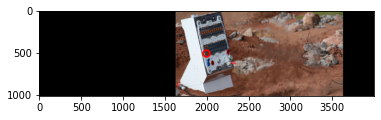

step  4 / 5
rcCx  3 ,motestx  [10, -12, 3] , stepx  2


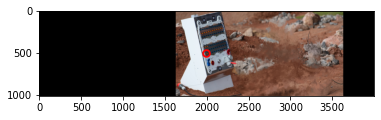

moving
oscilaltions along x!horizontal speed reduction
step  0 / 2
rcCx  -3 ,motestx  [-12, 3, -3] , stepx  1


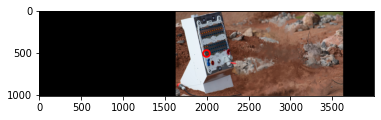

step  1 / 2
rcCx  -3 ,motestx  [-12, 3, -3] , stepx  1


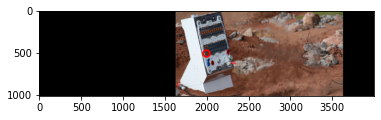

moving
step  0 / 2
rcCx  -1 ,motestx  [3, -3, -1] , stepx  1


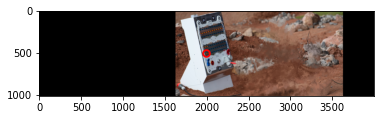

step  1 / 2
rcCx  -1 ,motestx  [3, -3, -1] , stepx  1


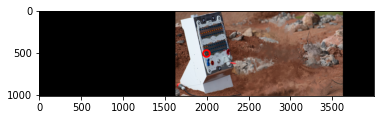

moving
step  0 / 2
rcCx  1 ,motestx  [-3, -1, 1] , stepx  1


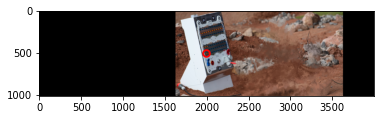

step  1 / 2
rcCx  1 ,motestx  [-3, -1, 1] , stepx  1


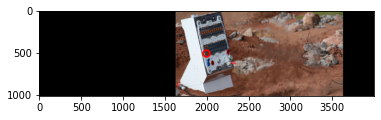

moving
oscilaltions along x!horizontal speed reduction
rcCx  -1 ,motestx  [-1, 1, -1] , stepx  1


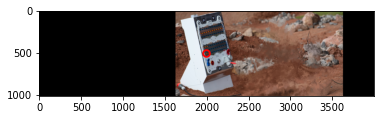

moving
rcCx  0 ,motestx  [1, -1, 0] , stepx  1


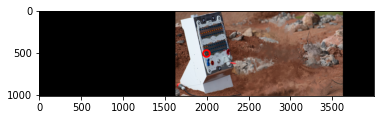

terminating motion along x...
motion terminated


In [16]:
# if 1 will record, otherwise will print
toggleVideoRec=0

# FOREGROUND
# ROI center in foreground coordinates
rcox,rcoy=rco
# roi dimensions
# wr, hr
##dimensions to construct the fake background
h,w,_=foreground.shape
##center for alignment pourposes, in foreground coord.
co=(w//2,h//2)


# BACKGROUND 
##result of masking the camera POV, big enough to center each possible roi
## height depending on max nearess robot will approach the pannel, as for now: *2
backchan=np.zeros((h*2,w*2),np.uint8)
##3 black channels
background=cv.merge([backchan,backchan,backchan])
# dimensions
H,W,_=background.shape
# center in POV coord.
CO=(W//2,H//2)

# IMAGE CENTERS GEOMETRY
# rcC= rcO-CO=rco+oO-CO
## rcC: POV center-ROI center; to minimize
## rcO: roi center in POV coord.
## CO: background center in POV coord.
## oO: foreground origin in POV coord.

# starting position of foreground in POV camera
##imaging POV camera support similarly moves along vertical axis, random horizontal position
oO=oOx,oOy=0,CO[1]-rcoy
#oO=oOx,oOy=CO[0],CO[1]-rcoy

#_add random x position with test on dimension of background and foreground
##_ position will be outside a certaint range around the POV center

##addiotional geometries
# rcO=roO+rcro
## roO: roi origin in POV coord.
## rcro: roi center in ROI coord.== (wr/2,hr/2); const
# roO=roo+oO
## roo: roi origin in FOREGROUND coord.; const
    
# MOTION PARAMETERS
# robot traverse action (simulation by moving the image)
motx=motx0=90
# (for graphical reasons) traverse action divided in steps â‚¬[1,motx]
stepx=stepx0=45
##effective motion is of motx entity, which is performed in stepx entity steps

# motion termination criterion, by roi and POV center distance
epsx=0
# motion action dimming test array 
motestx=[]

# VIDEO RECORDING
if toggleVideoRec:
    # empty video array and frame dimensions
    video_array = []
    video_size = (W,hr)
    #_adapt width to starting initial conditoin for foreground
    
print('video recording started') if toggleVideoRec else print('motion starting')

while(1):

    rcO=[sum(jj) for jj in zip(rco, oO)]##increasing
    rcC=rcCx,rcCy=[sum(jj) for jj in zip(CO, np.negative(rcO))]##as convention

    # array accumulation
    motestx.append(rcCx)
    # array accumulation stop criterion
    if len(motestx)>3:
    ##this may be slower than simply initializing motestx=[0,0,0]
    ##also, test of distance performed on rcCx directly, not on array
        motestx.pop(0)
        # tracks distances history to find oscillations around target (POV center)
        if motestx[0]*motestx[1]<0 and motestx[0]*motestx[2]>0:
            # traverse action dimming
            motx=motx//2
            if stepx>1: stepx=stepx//2
            if not toggleVideoRec:print('oscilaltions along x!horizontal speed reduction')
            #_may modify in motion proportional to distance, ie K control
       
    # MOTION PERFORMANCE
    # motion direction detection
    actualx=stepx if rcCx>0 else -stepx   
    # motion steps performance
    for count in range(0,motx,stepx):
        if stepx!=motx:print('step ',count,'/',motx) 
        # motion of foreground position toward center
        oO=oOx,oOy=oOx+actualx,oOy
        # creation of a new empty background
        backprint=background.copy()
        # foreground insertion
        backprint[oOy:oOy+h,oOx:oOx+w]=forehud
        # POV center marker
        cv.circle(backprint,CO,40,(0,0,255),20)
        
        motOutput=backprint[CO[1]-(hr//2):CO[1]+hr//2,:]
        # output redirection
        if toggleVideoRec:
            video_print=motOutput
            video_array.append(video_print)
        else:
            #print('rcCx ',rcCx,',motestx ',motestx,', stepx ',stepx)#debug
            plt.imshow(cv.cvtColor(motOutput,cv.COLOR_BGR2RGB))
            #plt.imshow(cv.cvtColor(motOutput[:,min(rcO[0]-wr//2-5,CO[0]-wr//2-5):\
            #        max(rcO[0]+wr//2+5,CO[0]+wr//2+5)],cv.COLOR_BGR2RGB))
            plt.show()
             
    # motion termination test
    if abs(rcCx)<=epsx:
        # reset traverse actions for future requests
        motx=motx0
        stepx=stepx0
        if not toggleVideoRec:print('terminating motion along x...')
        # interrupts action
        break
        
    if not(toggleVideoRec): print('moving')
        
if not(toggleVideoRec): print('motion terminated') 

# video memorization
if toggleVideoRec:
    video_out = cv.VideoWriter('../../images/z_other/video/video_task.avi',cv.VideoWriter_fourcc(*'DIVX'), 15, video_size) 
    extendedFrames=2
    if extendedFrames>1:
        video_array2=[ii for ii in video_array for jj in range(2)]
        for ii in video_array2: video_out.write(ii)
    else:
        for ii in video_array: video_out.write(ii)
            
    video_out.release()

    print('video recording terminated')

In [ ]:
def moTraverse(xmotion,xstep,xdist,framedist,imgbackground,imgforeground)

return framedist,outputimg
# MOTION PERFORMANCE
    # motion direction detection
    actualx=xstep if xdist>0 else -xstep  
    # motion steps performance
    for count in range(0,xmotion,xstep):
        if xstep!=xmotion:print('step ',count,'/',xmotion) 
        # motion of foreground position toward center
        framedist=framedistx,framedisty=framedist[0]+actualx,framedist[1]
        # creation of a new empty background
        imgbackprint=imgbackground.copy()
        # foreground insertion
        foregroundh,foregroundw,_=imgforeground.shape
        imgbackprint[framedisty:framedisty+foregroundh,\
                     framedistx:framedistx+foregroundw]=imgforeground
        # POV center marker
        backgroundCenter,_=list(reversedimgbackground.shape
        cv.circle(imgbackprint,CO,40,(0,0,255),20)
        
        motOutput=backprint[CO[1]-(hr//2):CO[1]+hr//2,:]
        # output redirection
        if toggleVideoRec:
            video_print=motOutput
            video_array.append(video_print)
        else:
            #print('rcCx ',rcCx,',motestx ',motestx,', stepx ',stepx)#debug
            plt.imshow(cv.cvtColor(motOutput,cv.COLOR_BGR2RGB))
            #plt.imshow(cv.cvtColor(motOutput[:,min(rcO[0]-wr//2-5,CO[0]-wr//2-5):\
            #        max(rcO[0]+wr//2+5,CO[0]+wr//2+5)],cv.COLOR_BGR2RGB))
            plt.show()

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

https://pythonexamples.org/python-opencv-cv2-resize-image/

https://stackoverflow.com/questions/4195453/how-to-resize-an-image-with-opencv2-0-and-python2-6



# FOREGROUND TRACKING

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#camshift
#videosrc='../../images/video/notebed.mp4'
#cap = cv.VideoCapture(videosrc)
# setup initial location of window
track_window = (xR+20, yR+20, wR+20, hR+20)
# set up the ROI for tracking
roiR=foreground[yR:yR+hR,xR:xR+wR]
#histroi=np.histogram(roiR,255,[1,256])[0]
roiR=cv.cvtColor(roiR,cv.COLOR_BGR2HSV)
histroi=cv.calcHist([roiR],[0,1], None ,[179,255], [1,180,1,256] ) #equal to:
#histroi=cv.calcHist([cv.cvtColor(foreground,cv.COLOR_BGR2HSV)],[0,1], hullMask ,[179,255], [1,180,1,256] )
cv.normalize(histroi,histroi,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
# backprojection

while(1):
    frame=cv.imread('../../images/marsyard/task.jpg')
    if 1:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],histroi,[0,180],1)
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
        else:
            break
cv.destroyAllWindows()
